# Import

## Librerie

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [5]:
rel_path = "../dataset/"

In [6]:
def load_userinfo(filepath):
    df = pd.read_csv(filepath)
    df.drop(df.columns[[0, 3]], axis=1, inplace=True)
    df.columns = ['user_id', 'timezone', 'sex', 'age', 'height']
    #print(df)
    return df

load_userinfo(rel_path + "userinfo.csv")

,user_id,timezone,sex,age,height
0,fe5d7aacd82682e68d94ea1e6aa33a1e858337f7,PDT,Female,39,175
1,88359b8e24f4d6b758fb4566860ba9842fc5b350,UTC,Male,26,179
2,e061ccf5eece921027f618686a5aa2412d753b6b,PDT,Female,27,169
3,2e88aac4e69049d0845a5e2dce661ae8f4f55239,UTC,Male,61,177
4,b4e87340761e4c917db734cd52f56ed9abd0b314,UTC,Male,48,167
...,...,...,...,...,...
11608,9301626287129295bfbb3b23b353d8a325467bfb,UTC,Male,47,177
11609,265cceeb7baab0a461708ef7e79f861f9e10c9c4,PDT,Male,61,192
11610,f8304a01c96e8d2ca656aa501c3c211615a467a2,UTC,Male,42,186
11611,bb00f217ebdabe0527c4a72f1fa43efd8e0f3073,PDT,Female,23,151


In [7]:
def load_data(filepath):
    df = pd.read_csv(filepath)
    df.drop(df.columns[[0]], axis=1, inplace=True)
    df.columns = ['user_id', 'date', 'type_data', 'value']
    return df
    # print(df)
# type_data varia nel range 1-27 (vedere foto) (sono le feature del dataset)


df_data = load_data(rel_path + "data.csv")


# Data processing

Divisione del dataset originale in 27 (come le features) mini dataset.
I mini dataset sono poi riuniti per ottenere un dataset unico che per ogni riga contiene i valori di tutte le features in base a giorno e persona.
Si unisce il dataset delle features a i dati (id, sesso, eta, altezza) delle persone.

In [8]:
# split dataset nelle 27 features
num_features = 27
feature_names = [None,"steps", "weight", "BMI", "systolic blood presure", "pulse wave velocity", "pww healtiness", 
                        "heart rate avg", "heart rate min", "heart rate max", "sleep duration", "bedin"
                        ,"bedout", "nbawake", "awakeduration", "timetosleep", "timetowakeup", "lightduration",
                        "remduration", "deepduration", "activitytype", "activityduration", "activitycalories",
                        "activityhrAVG", "activityhrMIN", "activityhrMAX", "stepsgaitspeed", "distancegaitspeed"]


df_array = [] # inizializzazione array di dataset

# creazione dei 27 mini dataset inseriti in un array 
for i in range(1,num_features+1):
    # creo un array di booleani sulla base del type_data che poi utilizzo per selezionare le righe utili 
    df_mask = df_data['type_data'] == i
    df_feature_i = df_data[df_mask]
    # elimino colonna relativa a type_data
    df_feature_i.drop(df_data.columns[[2]], axis=1, inplace=True)
    # rinomino le colonne in modo tale da mettere in evidenza il nome della feature
    df_feature_i.columns=["user_id","date", feature_names[i]]
    df_array.append(df_feature_i)

df_array[1].head()

C:\Users\stefa\AppData\Local\Temp\ipykernel_3756\3227206925.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature_i.drop(df_data.columns[[2]], axis=1, inplace=True)
C:\Users\stefa\AppData\Local\Temp\ipykernel_3756\3227206925.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature_i.drop(df_data.columns[[2]], axis=1, inplace=True)
C:\Users\stefa\AppData\Local\Temp\ipykernel_3756\3227206925.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

,user_id,date,weight
0,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-01,86.80
17,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-02,86.81
34,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-03,86.79
49,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-04,87.71
57,2bc16eda651db5936cd31e735c815296fc1579d9,2016-04-05,86.78


In [9]:
# riunisco i mini dataset in un dataset finale (MEMO ".drop_duplicates()")
df_final = df_array[0]
for i in range(1,num_features):
    df_final = df_final.merge(df_array[i], on=["user_id","date"], how="outer")

In [10]:
len(df_final)

8752126

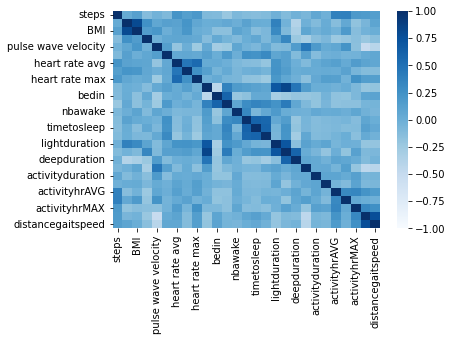

In [16]:
sns.heatmap(df_final.corr(), vmin=-1, vmax=1, cmap="Blues")
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
